In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fname01 = 'tpstep_01.dat'
fname02 = 'tpstep_02.dat'
fname03 = 'tpstep_03.dat'
fname04 = 'tpstep_04.dat'
fname05 = 'tpstep_05.dat'
fname06 = 'tpstep_06.dat'
fname07 = 'tpstep_07.dat'

t01 = pd.read_csv(fname01).values
t02 = pd.read_csv(fname02).values
t03 = pd.read_csv(fname03).values
t04 = pd.read_csv(fname04).values
t05 = pd.read_csv(fname05).values
t06 = pd.read_csv(fname06).values
t07 = pd.read_csv(fname07).values

N = t01.size - 1
x = np.linspace(0,N,N+1)

tlast01 = t01[N]
tlast02 = t02[N]
tlast03 = t03[N]
tlast04 = t04[N]
tlast05 = t05[N]
tlast06 = t06[N]
tlast07 = t07[N]

In [27]:
print(tlast01,tlast02,tlast03,tlast04,tlast05,tlast06,tlast07);

[3.23237] [-0.0987654] [2.67857] [1.96453] [-0.0987654] [-0.0987654] [-0.0987654]


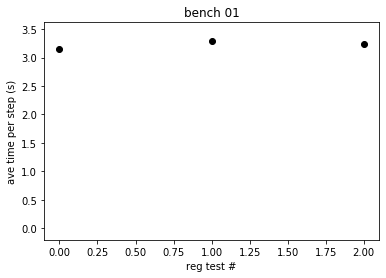

In [29]:
plt.plot(x,t01,'o',color='black');plt.xlabel('reg test #');plt.ylabel('ave time per step (s)');plt.title('bench 01');plt.ylim(-0.20,max(0,1.1*np.max(t01)));

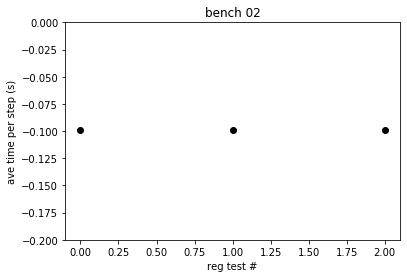

In [33]:
plt.plot(x,t02,'o',color='black');plt.xlabel('reg test #');plt.ylabel('ave time per step (s)');plt.title('bench 02');plt.ylim(-0.2,max(0,1.1*np.max(t02)));

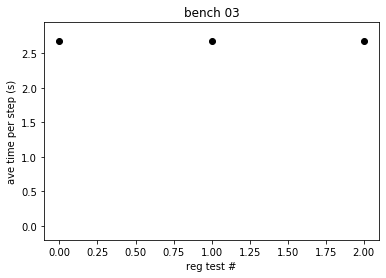

In [34]:
plt.plot(x,t03,'o',color='black');plt.xlabel('reg test #');plt.ylabel('ave time per step (s)');plt.title('bench 03');plt.ylim(-0.2,max(0,1.1*np.max(t03)));

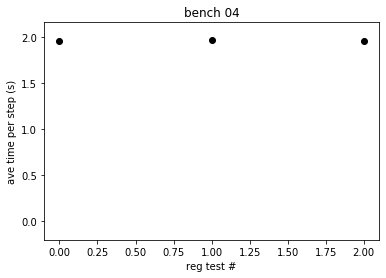

In [35]:
plt.plot(x,t04,'o',color='black');plt.xlabel('reg test #');plt.ylabel('ave time per step (s)');plt.title('bench 04');plt.ylim(-0.2,max(0,1.1*np.max(t04)));

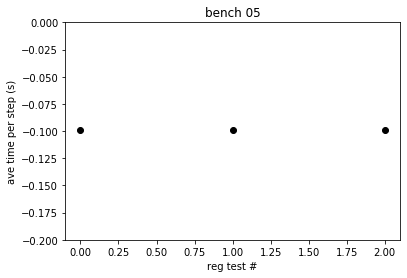

In [36]:
plt.plot(x,t05,'o',color='black');plt.xlabel('reg test #');plt.ylabel('ave time per step (s)');plt.title('bench 05');plt.ylim(-0.2,max(0,1.1*np.max(t05)));

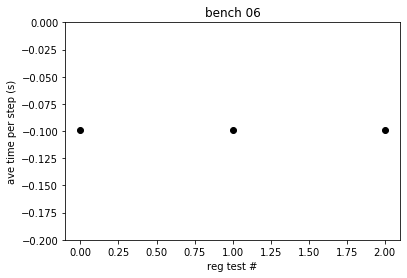

In [37]:
plt.plot(x,t06,'o',color='black');plt.xlabel('reg test #');plt.ylabel('ave time per step (s)');plt.title('bench 06');plt.ylim(-0.2,max(0,1.1*np.max(t06)));

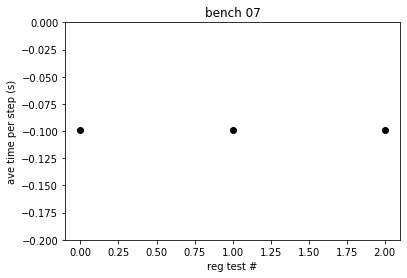

In [38]:
plt.plot(x,t07,'o',color='black');plt.xlabel('reg test #');plt.ylabel('ave time per step (s)');plt.title('bench 07');plt.ylim(-0.2,max(0,1.1*np.max(t07)));